In [99]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy import stats
from scipy.stats.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# load original data 
data = np.load('data_zscored.npy')

In [4]:
data.shape

(384, 2430)

In [6]:
# SVD the data matrix 
u, s, vh = np.linalg.svd(data, full_matrices=False)

In [46]:
def plot_s(s):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(7,3))

    ax1.plot(s)
    ax1.set_xlabel('i')
    ax1.set_ylabel('sigma_i')
    ax1.set_title('singular values')

    # get variance
    variance_list = []
    for i in range(len(s)):
        variance_list.append(s[i]**2/np.sum(s**2))
    
    ax2.plot(variance_list, 'o-')
    ax2.set_xlabel('principal component')
    ax2.set_ylabel('% variance')
    ax2.set_title('% variance')
    
    ax3.plot(variance_list[:10], 'o-')
    ax3.set_xlabel('principal component')
    ax3.set_ylabel('% variance')
    ax3.set_title('% var for first 3 PC')

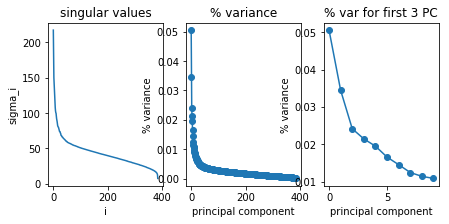

In [47]:
plot_s(s)

In [48]:
data.shape

(384, 2430)

In [53]:
PC3 = np.zeros((3, data.shape[1]))
for i in range(3):
    PC3[i,:] = vh[i,:]*s[i]

In [56]:
ls

01_PCA_data_z-score.ipynb        data.npy
01.png                           data_zscored.npy
02_PCA_temporal_smoothing.ipynb  finalp2.py
02.png                           finalp.py
03_PCA.ipynb                     Gau_smoothed_001.npy
03.png                           Gau_smoothed_01.npy
04_by_area.ipynb                 key.csv*
04.png                           neuron_delete_ind.npy
0_get_trial.ipynb                runing_speed.npy*
1_bin_trial.ipynb                trial_10.npy
2_all_data.ipynb                 trial_5.npy
activity.npy*                    trial.npy
area_list_384.npy                try_0_visualize_data.ipynb
data_bin_10.npy                  unused_code .ipynb
data_bin_5.npy


In [57]:
run = np.load('runing_speed.npy')

In [58]:
run.shape

(1, 98, 2430)

In [59]:
run = run.reshape((98, 2430))

In [66]:
num_nan = []
for i_repeat in range(98):
    n = np.sum(np.isnan(run[i_repeat,:]))
    num_nan.append(n)

In [71]:
run_ave = np.nanmean(run, axis=0)

In [72]:
run_ave.shape

(2430,)

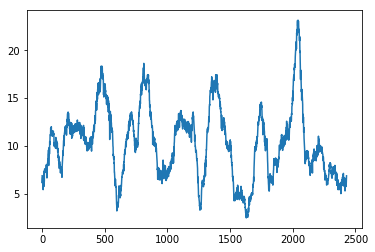

In [73]:
plt.plot(run_ave)

In [74]:
np.save('run_ave', run_ave)

In [78]:
run_zed = stats.zscore(run_ave)

In [79]:
np.save('run_zscored', run_zed)

In [75]:
PC3.shape

(3, 2430)

Text(0.5,1,'First three PCs')

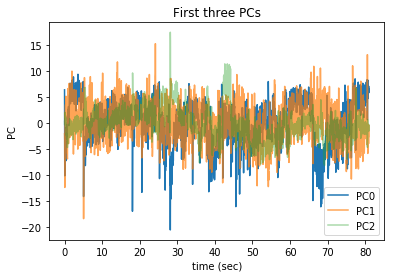

In [140]:
plt.figure()
for i in range(3):
    plt.plot(time, PC3[i, :], alpha=1.0-0.3*i, label='PC'+str(i))
plt.legend()
plt.xlabel('time (sec)')
plt.ylabel('PC')
plt.title('First three PCs')

In [138]:
time = np.arange(0,81,1/30)

In [139]:
len(time)

2430

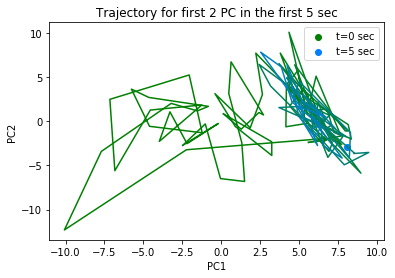

In [130]:
t_start = 0
t_end = 150

x = PC3[0,t_start:t_end]
y = PC3[1,t_start:t_end]
n = len(x)

# Your colouring array
T=np.linspace(0,1,np.size(x))**2
fig = plt.figure()
ax = fig.add_subplot(111)

# Segement plot and colour depending on T
s = 10 # Segment length
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1],y[i:i+s+1],color=(0.0,0.5,T[i]))
ax.scatter(x[0], y[0], label='t=0 sec', color=(0.0,0.5,T[0]))
ax.scatter(x[-1], y[-1], label='t=5 sec', color=(0.0,0.5,T[-1]))
plt.title('Trajectory for first 2 PC in the first 5 sec')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

Text(0.5,0.92,'Trajectory for first 3 PC in the first 5 sec')

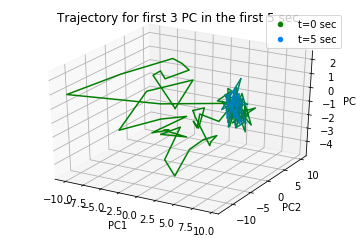

In [134]:
t_start = 0
t_end = 150 
fig = plt.figure()
ax = fig.gca(projection='3d')

x = PC3[0,t_start:t_end]
T=np.linspace(0,1,np.size(x))**2
s = 10 # Segment length
for i in range(0,n-s,s):
    ax.plot(PC3[0,i:i+s+1], PC3[1,i:i+s+1], PC3[2,i:i+s+1], color=(0.0,0.5,T[i]))
ax.scatter(PC3[0,t_start], PC3[1,t_start], PC3[2,t_start], label='t=0 sec', color=(0.0,0.5,T[0]))
ax.scatter(PC3[0,t_end-t_start-1], PC3[1,t_end-t_start-1], PC3[2,t_end-t_start-1], label='t=5 sec', color=(0.0,0.5,T[-1]))
plt.legend()

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Trajectory for first 3 PC in the first 5 sec')

In [94]:
for i in range(3):
    cov = pearsonr(run_zed, PC3[i,:])[0]
    print('PC'+str(i)+': '+str(cov))

PC0: -0.3427161317559347
PC1: 0.27136326267553856
PC2: 0.17318044057513313
